In [10]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [11]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape

(10000,)

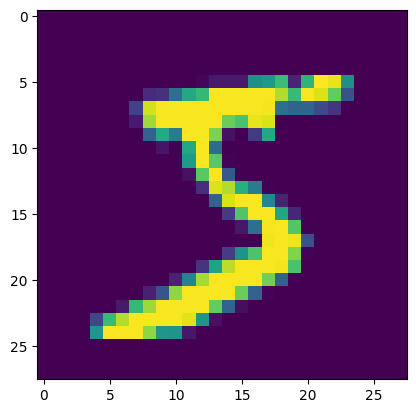

In [18]:
plt.imshow(x_train[0])

Normalizing the Train and Test Data

In [19]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
model=tf.keras.models.Sequential()

In [23]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [24]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

In [25]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
m=model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3134 - accuracy: 0.9123
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1398 - accuracy: 0.9584
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0955 - accuracy: 0.9720
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9787
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9923
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.save("handwritten.model")

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [31]:
model=tf.keras.models.load_model('handwritten.model')

In [32]:
y_prob=model.predict(x_test)

313/313 [==============================] - 2s 3ms/step


In [33]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
y_predict=y_prob.argmax(axis=1)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_predict)

0.9743

In [37]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1063 - accuracy: 0.9743


In [38]:
print(loss)

0.10631027817726135


In [39]:
print(accuracy)

0.9743000268936157


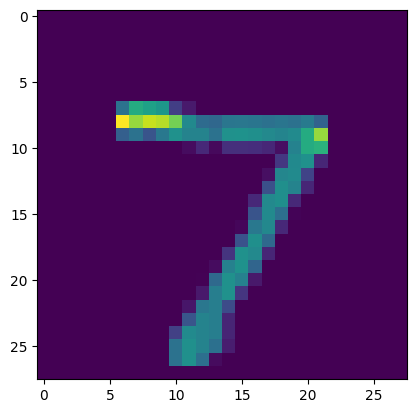

In [40]:
plt.imshow(x_test[0])

In [41]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 55ms/step


array([7], dtype=int64)